## <u> Citi: Week 4 training: Python data analysis <u>     
## Name - Ganesh Bhagwat Sangale

In [1]:
import os
import urllib.request
import csv
import pandas as pd
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go

## Task 1: Identify one or more suitable web APIs

The APIs chosen for this assignment are provided by <b>https://data.gov.ie/</b>

For this assignment we have used the following 2 APIs:

1. https://data.gov.ie/dataset/social-housing-construction-status-report-q2-2019/resource/8e9301e9-d373-40bc-9fb0-d64e66ba33f7

This API gives data of <b>'Social Housing Construction Status Report Q2 2019'</b>

2. https://data.gov.ie/dataset/social-housing-construction-status-report-q3-2019/resource/01f9f2d5-39e9-457d-a15f-ada766d4d1aa

This API gives data of <b>'Social Housing Construction Status Report Q3 2019'</b>

Both these APIs are published by 'Department of Housing, Planning and Local Government, Ireland'

Also, both the APIs are open web APIs and do not require any API key to retrieve the data.

## Task 2: Collect data your chosen APIs
## Data retrieval, parsing, and storage

We are aiming to collect the <b>JSON</b> data from the above mentioned API and store it into appropriate data format of <b>CSV files</b>

Data of Q2-2019 is stored in the file <b>Q2-2019 Raw Dataset.csv</b>

Data of Q3-2019 is stored in the file <b>Q3-2019 Raw Dataset.csv</b>

In [2]:
url_1="https://api.usmart.io/org/ae1d5c14-c392-4c3f-9705-537427eeb413/abe75ee2-f764-47ee-95f1-6f3c6976225b/1/urql"
url_2="https://api.usmart.io/org/ae1d5c14-c392-4c3f-9705-537427eeb413/60eed830-56d5-45d8-a9a7-7d88dfcd268e/1/urql"
try:
    response_1 = urllib.request.urlopen(url_1)
    raw_json_1 = response_1.read().decode("utf-8")
    response_2 = urllib.request.urlopen(url_2)
    raw_json_2 = response_2.read().decode("utf-8")
except:
    print("Failed to retrive data from API.")
    
# Collect the JSON data from the requested APIs
data_1 = json.loads(raw_json_1)
data_2 = json.loads(raw_json_2)

In [3]:
# This fucntion is created to parse and  Store the JSON data of APIs to CSV files.

def convert_JSON_data_to_CSV(filename, data_passed):
    data = open(filename, 'w',encoding="utf-8")
    csvwriter = csv.writer(data)
    count=0
    for d in data_passed:
        if count==0:
            header=d.keys()
            csvwriter.writerow(header)
            count += 1
        csvwriter.writerow(d.values())   
    data.close()
    df = pd.read_csv(filename)
    df.to_csv(filename, index=False)
    
    
# Here we are storing the data of first API 1 to 'file1.csv' and data of API 2 to 'file2.csv'

convert_JSON_data_to_CSV("Q2-2019 Raw Dataset.csv", data_1)
convert_JSON_data_to_CSV("Q3-2019 Raw Dataset.csv", data_2)

## Task 3: Integration of data from multiple API

In this step, we are <b>integrating</b> data gathered from 2 different APIs and storing it into file <b>'Integrated Data.csv'</b> 

In [4]:
# This step is integrating the data of 2 APIs and store the integrated data into file 'Integrated data.csv'
# Load and represent the data using an appropriate data structure.


df_1=pd.read_csv("Q2-2019 Raw Dataset.csv")
df_2=pd.read_csv("Q3-2019 Raw Dataset.csv")

# Here we are changing the column heading of Q3-2019, so that it will match with column values of Q2-2019,
# As there is slight spelling change in headings of both these datasets.

df_2=df_2.rename(columns={'Stage 4 Tender Report of Final Turnkey/CALF approval': 'Stage 4 Tender Report or Final Turnkey/CALF approval'})
df_2=df_2.rename(columns={'On site':'On Site'})

df_combined= pd.concat([df_1, df_2], sort=False)
df_combined.to_csv("Integrated Dataset.csv", index=False)

## Task 4: Data pre-processing

1. Here we are <b>dropping unnecessary columns</b> of dataset which are not fully relevant to provide insights of the data. 


2. Also, we will be <b>replacing the blank values</b> of the required columns <b>with appropriate string of "Not Applicable"</b>, as the data is not required in that blank cells for analysis.


3. <b>Changing columns headings</b> of dataset 2, so that it will match with column headings of dataset 1 (There is minor spelling difference in spellings of dataset headings)- Note: Already done at the time of API data integration
    
    
4. Folowing are the <b>columns chosen for data analysis</b>:

    A. Funding Programme: Fundig programme under which house will build

    B. LA: Location of house or county

    C. No_of_Units: Number of houses

    D. Stage 1 Capital Appraisal: Status of house(Stage 1)- Capital Appraisal

    E. Stage 2 Pre-Planning: Status of house(Stage 2)- Pre-Planning of house

    F. Stage 3 Pre Tender design: Status of house(Stage 3)- Design of house prior to tender

    G. Stage 4 Tender Report or Final Turnkey/CALF approval: Final stage of house before ON SITE

    H. On Site: Houses which are building currently

    I. Completed: Houses which are completely builded

In [5]:
# Here we are dropping the unneccessary columns from the dataset which are not contributing to provide valuable insigts of the data 

df_1.drop(['No_','Scheme/Project Name' ,'Approved Housing Body','usmart_id'], axis=1, inplace=True)
df_2.drop(['No_','Scheme/Project Name' ,'Approved Housing Body','usmart_id'], axis=1, inplace=True)
df_combined.drop(['No_','Scheme/Project Name' ,'Approved Housing Body','usmart_id'], axis=1, inplace=True)


# This function is written to replace the blank values of CSV of  with term "Not Applicable" as the data is not required at that particular cell

def replace_NAN_with_appropriate_value(column_name):
    df_1[column_name]=df_1[column_name].fillna("Not Applicable")
    df_2[column_name]=df_2[column_name].fillna("Not Applicable")
    df_combined[column_name]=df_combined[column_name].fillna("Not Applicable")


# specific columns where data pre-processing is required.

column_to_clean=["Stage 1 Capital Appraisal","Stage 2 Pre Planning","Stage 3 Pre Tender design", "Stage 4 Tender Report or Final Turnkey/CALF approval", "On Site", "Completed"]

# Replacing blank values with the appropriate data

for i in column_to_clean:
    replace_NAN_with_appropriate_value(i)

Now we are printing <b>cleaned datasets</b> below:

In [6]:
print("Cleaned dataset of 'Social Housing Construction Status Report : Q2-2019")
df_1

Cleaned dataset of 'Social Housing Construction Status Report : Q2-2019


Funding Programme           LA  No_ of Units  \
0            SHIP CONSTRUCTION       Carlow            20   
1            SHIP CONSTRUCTION       Carlow             4   
2            SHIP CONSTRUCTION       Carlow            24   
3            SHIP CONSTRUCTION       Carlow             4   
4    SHIP CONSTRUCTION TURNKEY       Carlow            12   
5    SHIP CONSTRUCTION TURNKEY       Carlow            19   
6                 CALF Turnkey       Carlow            14   
7                 CALF Turnkey       Carlow            26   
8     CAS CONSTRUCTION TURNKEY        Cavan            29   
9            SHIP CONSTRUCTION        Cavan             2   
10           SHIP CONSTRUCTION        Cavan             4   
11           SHIP CONSTRUCTION        Cavan            15   
12           SHIP CONSTRUCTION        Cavan             3   
13           SHIP CONSTRUCTION        Cavan            22   
14                CALF Turnkey        Cavan             5   
15                CALF Turnkey        Cavan             2   
16            CAS CONSTRUCTION        Clare             4   
17    CAS CONSTRUCTION TURNKEY        Clare             2   
18           SHIP CONSTRUCTION        Clare            27   
19           SHIP CONSTRUCTION        Clare             2   
20                CALF Turnkey        Clare             2   
21            CAS CONSTRUCTION    Cork City             1   
22                REGENERATION    Cork City            16   
23                REGENERATION    Cork City            62   
24           SHIP CONSTRUCTION    Cork City             6   
25           SHIP CONSTRUCTION    Cork City             2   
26           SHIP CONSTRUCTION    Cork City             7   
27   SHIP CONSTRUCTION TURNKEY    Cork City            32   
28   SHIP CONSTRUCTION TURNKEY    Cork City             9   
29   SHIP CONSTRUCTION TURNKEY    Cork City             5   
..                         ...          ...           ...   
970  SHIP CONSTRUCTION TURNKEY    Cork City             9   
971  SHIP CONSTRUCTION TURNKEY    Cork City             4   
972  SHIP CONSTRUCTION TURNKEY    Cork City             2   
973  SHIP CONSTRUCTION TURNKEY    Cork City             6   
974               CALF Turnkey    Cork City            31   
975           CAS CONSTRUCTION  Cork County             9   
976           CAS CONSTRUCTION  Cork County             4   
977          SHIP CONSTRUCTION  Cork County            15   
978          SHIP CONSTRUCTION  Cork County             1   
979          SHIP CONSTRUCTION  Cork County            10   
980          SHIP CONSTRUCTION  Cork County            10   
981          SHIP CONSTRUCTION  Cork County            10   
982          SHIP CONSTRUCTION  Cork County             6   
983          SHIP CONSTRUCTION  Cork County             1   
984          SHIP CONSTRUCTION  Cork County             3   
985  SHIP CONSTRUCTION TURNKEY  Cork County            18   
986  SHIP CONSTRUCTION TURNKEY  Cork County             3   
987  SHIP CONSTRUCTION TURNKEY  Cork County            17   
988  SHIP CONSTRUCTION TURNKEY  Cork County            14   
989  SHIP CONSTRUCTION TURNKEY  Cork County            10   
990  SHIP CONSTRUCTION TURNKEY  Cork County            14   
991  SHIP CONSTRUCTION TURNKEY  Cork County             4   
992  SHIP CONSTRUCTION TURNKEY  Cork County             2   
993  SHIP CONSTRUCTION TURNKEY  Cork County             4   
994  SHIP CONSTRUCTION TURNKEY  Cork County             6   
995               CALF Turnkey  Cork County            10   
996               CALF Turnkey  Cork County            22   
997          CALF Construction  Cork County            40   
998          SHIP CONSTRUCTION          DLR             1   
999          SHIP CONSTRUCTION          DLR             4   

                             Stage 1 Capital Appraisal  \
0                                       Not Applicable   
1                                       Not Applicable   
2                                       Not Applicable  

In [7]:
print("Cleaned dataset of 'Social Housing Construction Status Report : Q3-2019")
df_2

Cleaned dataset of 'Social Housing Construction Status Report : Q3-2019


Funding Programme         LA  No_ of Units  \
0                 CALF Turnkey     Carlow             8   
1                 CALF Turnkey     Carlow            10   
2            SHIP CONSTRUCTION     Carlow             1   
3            SHIP CONSTRUCTION     Carlow             2   
4            SHIP CONSTRUCTION     Carlow             4   
5            SHIP CONSTRUCTION     Carlow            24   
6                 CALF Turnkey      Cavan            16   
7                 CALF Turnkey      Cavan             2   
8            SHIP CONSTRUCTION      Cavan             4   
9            SHIP CONSTRUCTION      Cavan             4   
10           SHIP CONSTRUCTION      Cavan            19   
11   SHIP CONSTRUCTION TURNKEY      Cavan             3   
12                CALF Turnkey      Clare             3   
13                CALF Turnkey      Clare             2   
14            CAS CONSTRUCTION      Clare             4   
15           SHIP CONSTRUCTION      Clare             9   
16           SHIP CONSTRUCTION      Clare            27   
17           CALF Construction  Cork City             3   
18                CALF Turnkey  Cork City             6   
19                REGENERATION  Cork City            62   
20           SHIP CONSTRUCTION  Cork City             5   
21           SHIP CONSTRUCTION  Cork City             9   
22           SHIP CONSTRUCTION  Cork City             5   
23           SHIP CONSTRUCTION  Cork City             3   
24           SHIP CONSTRUCTION  Cork City            17   
25           SHIP CONSTRUCTION  Cork City            57   
26           SHIP CONSTRUCTION  Cork City            42   
27           SHIP CONSTRUCTION  Cork City             5   
28           SHIP CONSTRUCTION  Cork City            20   
29           SHIP CONSTRUCTION  Cork City             2   
..                         ...        ...           ...   
970               CALF Turnkey    Wexford            10   
971          SHIP CONSTRUCTION    Wexford            18   
972          SHIP CONSTRUCTION    Wexford             7   
973          SHIP CONSTRUCTION    Wexford             1   
974          SHIP CONSTRUCTION    Wexford             7   
975          SHIP CONSTRUCTION    Wexford            17   
976          SHIP CONSTRUCTION    Wexford             4   
977          SHIP CONSTRUCTION    Wexford             8   
978  SHIP CONSTRUCTION TURNKEY    Wexford             5   
979  SHIP CONSTRUCTION TURNKEY    Wexford             4   
980               CALF Turnkey    Wicklow             4   
981               CALF Turnkey    Wicklow             2   
982          SHIP CONSTRUCTION    Wicklow            17   
983          SHIP CONSTRUCTION    Wicklow            30   
984          SHIP CONSTRUCTION    Wicklow             7   
985    SHIP CONSTRUCTION RAPID    Wicklow            31   
986  SHIP CONSTRUCTION TURNKEY    Wicklow             2   
987  SHIP CONSTRUCTION TURNKEY    Wicklow             1   
988  SHIP CONSTRUCTION TURNKEY    Wicklow             2   
989  SHIP CONSTRUCTION TURNKEY    Wicklow            16   
990               CALF Turnkey     Carlow            27   
991               CALF Turnkey     Carlow            12   
992               CALF Turnkey     Carlow            16   
993               CALF Turnkey     Carlow            14   
994               CALF Turnkey     Carlow             8   
995               CALF Turnkey     Carlow             8   
996               CALF Turnkey     Carlow            12   
997               CALF Turnkey     Carlow            26   
998          SHIP CONSTRUCTION     Carlow             4   
999          SHIP CONSTRUCTION     Carlow             1   

                             Stage 1 Capital Appraisal  \
0                                       Not Applicable   
1                                       Not Applicable   
2                                       Not Applicable   
3                                       Not Applicable   
4                                       Not Applicable   
5     

In [8]:
print("Cleaned Integrated dataset of 'Social Housing Construction Status Report : Q2-2019 & Q3-2019")
df_combined

Cleaned Integrated dataset of 'Social Housing Construction Status Report : Q2-2019 & Q3-2019


Funding Programme         LA  No_ of Units  \
0            SHIP CONSTRUCTION     Carlow            20   
1            SHIP CONSTRUCTION     Carlow             4   
2            SHIP CONSTRUCTION     Carlow            24   
3            SHIP CONSTRUCTION     Carlow             4   
4    SHIP CONSTRUCTION TURNKEY     Carlow            12   
5    SHIP CONSTRUCTION TURNKEY     Carlow            19   
6                 CALF Turnkey     Carlow            14   
7                 CALF Turnkey     Carlow            26   
8     CAS CONSTRUCTION TURNKEY      Cavan            29   
9            SHIP CONSTRUCTION      Cavan             2   
10           SHIP CONSTRUCTION      Cavan             4   
11           SHIP CONSTRUCTION      Cavan            15   
12           SHIP CONSTRUCTION      Cavan             3   
13           SHIP CONSTRUCTION      Cavan            22   
14                CALF Turnkey      Cavan             5   
15                CALF Turnkey      Cavan             2   
16            CAS CONSTRUCTION      Clare             4   
17    CAS CONSTRUCTION TURNKEY      Clare             2   
18           SHIP CONSTRUCTION      Clare            27   
19           SHIP CONSTRUCTION      Clare             2   
20                CALF Turnkey      Clare             2   
21            CAS CONSTRUCTION  Cork City             1   
22                REGENERATION  Cork City            16   
23                REGENERATION  Cork City            62   
24           SHIP CONSTRUCTION  Cork City             6   
25           SHIP CONSTRUCTION  Cork City             2   
26           SHIP CONSTRUCTION  Cork City             7   
27   SHIP CONSTRUCTION TURNKEY  Cork City            32   
28   SHIP CONSTRUCTION TURNKEY  Cork City             9   
29   SHIP CONSTRUCTION TURNKEY  Cork City             5   
..                         ...        ...           ...   
970               CALF Turnkey    Wexford            10   
971          SHIP CONSTRUCTION    Wexford            18   
972          SHIP CONSTRUCTION    Wexford             7   
973          SHIP CONSTRUCTION    Wexford             1   
974          SHIP CONSTRUCTION    Wexford             7   
975          SHIP CONSTRUCTION    Wexford            17   
976          SHIP CONSTRUCTION    Wexford             4   
977          SHIP CONSTRUCTION    Wexford             8   
978  SHIP CONSTRUCTION TURNKEY    Wexford             5   
979  SHIP CONSTRUCTION TURNKEY    Wexford             4   
980               CALF Turnkey    Wicklow             4   
981               CALF Turnkey    Wicklow             2   
982          SHIP CONSTRUCTION    Wicklow            17   
983          SHIP CONSTRUCTION    Wicklow            30   
984          SHIP CONSTRUCTION    Wicklow             7   
985    SHIP CONSTRUCTION RAPID    Wicklow            31   
986  SHIP CONSTRUCTION TURNKEY    Wicklow             2   
987  SHIP CONSTRUCTION TURNKEY    Wicklow             1   
988  SHIP CONSTRUCTION TURNKEY    Wicklow             2   
989  SHIP CONSTRUCTION TURNKEY    Wicklow            16   
990               CALF Turnkey     Carlow            27   
991               CALF Turnkey     Carlow            12   
992               CALF Turnkey     Carlow            16   
993               CALF Turnkey     Carlow            14   
994               CALF Turnkey     Carlow             8   
995               CALF Turnkey     Carlow             8   
996               CALF Turnkey     Carlow            12   
997               CALF Turnkey     Carlow            26   
998          SHIP CONSTRUCTION     Carlow             4   
999          SHIP CONSTRUCTION     Carlow             1   

                             Stage 1 Capital Appraisal  \
0                                       Not Applicable   
1                                       Not Applicable   
2                                       Not Applicable   
3                                       Not Applicable   
4                                       Not Applicable   
5     

In [9]:
# Storing clean datasets in CSV fiiles

df_1.to_csv("Q2-2019 Clean Dataset.csv")
df_2.to_csv("Q3-2019 Clean Dataset.csv")
df_combined.to_csv("Integrated Clean Dataset.csv")

## Task 5: Data characterization, description and analysis

First we will find the unique funding programmes for Q2-2019, Q3-2019 and in integrated dataset of Q2,Q3-2019

In [10]:
print("Size of Unique Funding Programme List of Q2-2019: "+ str(df_1["Funding Programme"].unique().size)+"\n")
print(df_1["Funding Programme"].unique())
print("---------------------------------------------------------------")
print("Size of Unique Funding Programme List of Q3-2019: "+ str(df_2["Funding Programme"].unique().size)+"\n")
print(df_2["Funding Programme"].unique())
print("---------------------------------------------------------------")
print("Size of Unique Funding Programme List from integrated dataset: "+ str(df_combined["Funding Programme"].unique().size)+"\n")
print(df_combined["Funding Programme"].unique())

Size of Unique Funding Programme List of Q2-2019: 10

['SHIP CONSTRUCTION' 'SHIP CONSTRUCTION TURNKEY' 'CALF Turnkey'
 'CAS CONSTRUCTION TURNKEY' 'CAS CONSTRUCTION' 'REGENERATION'
 'SHIP CONSTRUCTION RAPID' 'PUBLIC PRIVATE PARTNERSHIP (Bundle 2)'
 'CALF Construction' 'PUBLIC PRIVATE PARTNERSHIP (Bundle 1)']
---------------------------------------------------------------
Size of Unique Funding Programme List of Q3-2019: 11

['CALF Turnkey' 'SHIP CONSTRUCTION' 'SHIP CONSTRUCTION TURNKEY'
 'CAS CONSTRUCTION' 'CALF Construction' 'REGENERATION'
 'PUBLIC PRIVATE PARTNERSHIP (Bundle 2)' 'SHIP CONSTRUCTION RAPID'
 'CAS CONSTRUCTION TURNKEY' 'PUBLIC PRIVATE PARTNERSHIP (Bundle 1)'
 'CAS CONSTRUCTION SINGLE STAGE']
---------------------------------------------------------------
Size of Unique Funding Programme List from integrated dataset: 11

['SHIP CONSTRUCTION' 'SHIP CONSTRUCTION TURNKEY' 'CALF Turnkey'
 'CAS CONSTRUCTION TURNKEY' 'CAS CONSTRUCTION' 'REGENERATION'
 'SHIP CONSTRUCTION RAPID' '

From the above code snippet, it is clear that for <b>Q2-2019</b> we had <b>10</b> unique funding programmes, for <b>Q3-2019 </b>there were <b>11</b> unique funding programmes.

Thus, combinely we have <b>11</b> unique funding programmes</b> in <b>integrated dataset</b>.

In [11]:
# Function to convert any dictionary data structure to corresposnding dataframe
# Here we are keeping the dataframe ready to use it easily for data visualization

def convert_dict_to_dataframe(dic):
    data_items = dic.items()
    data_list = list(data_items)
    df_dict_data = pd.DataFrame(data_list)
    return df_dict_data


# Fucntion to calculate number of houses in particular location (County)

def calculate_sum_of_house_units_Location(df_l):
    dic_1 ={}
    for i,v in df_l.iterrows():
        if v[1] in dic_1:
            dic_1[v[1]]+=v[2]
        else:
            dic_1[v[1]] = v[2]
    return dic_1

In [12]:
# Number of houses depending on 'LOCATION' in Q2-2019

df_1_LA_No_of_Units= convert_dict_to_dataframe(calculate_sum_of_house_units_Location(df_1))
df_1_LA_No_of_Units.columns = ['Location', 'Sum of house units']
print("Location and its corresponding house counts, Q2-2019: ")
df_1_LA_No_of_Units

Location and its corresponding house counts, Q2-2019: 


Location  Sum of house units
0          Carlow                 307
1           Cavan                 201
2           Clare                 325
3       Cork City                1142
4     Cork County                1304
5             DLR                 477
6         Donegal                 284
7     Dublin City                1985
8          Fingal                 670
9     Galway City                 276
10  Galway County                 332
11          Kerry                 392
12        Kildare                 608
13       Kilkenny                 377
14          Laois                 194
15        Leitrim                  28
16       Limerick                 366
17       Longford                 138
18          Louth                 741
19           Mayo                 151
20          Meath                 604
21       Monaghan                 292
22         Offaly                 185
23      Roscommon                 161
24          Sligo                 166
25   South Dublin                 771
26      Tipperary                 248
27      Waterford                 424
28      Westmeath                 157
29        Wexford                 507
30        Wicklow                 554

In [13]:
# This step gives the data insigts of Q2-2019 (Location and house units) with following result:

df_1_LA_No_of_Units.describe()

Sum of house units
count           31.000000
mean           463.451613
std            402.534954
min             28.000000
25%            197.500000
50%            332.000000
75%            579.000000
max           1985.000000

<u>Summary of Location and house units data of <b>Q2-2019</b>:</u>

Total count of <b>locations</b>= 31

<b>Average</b> number of houses in each location = 463

<b>Minimum houses</b> in particular location = 28

<b>Maximum count of houses</b> for any particular location = 1985

In [14]:
# Number of houses depending on 'LOCATION' in Q3-2019

df_2_LA_No_of_Units= convert_dict_to_dataframe(calculate_sum_of_house_units_Location(df_2))
df_2_LA_No_of_Units.columns = ['Location', 'Sum of house units']
print("Location and its corresponding house counts, Q3-2019: ")
df_2_LA_No_of_Units

Location and its corresponding house counts, Q3-2019: 


Location  Sum of house units
0          Carlow                 359
1           Cavan                 173
2           Clare                 269
3       Cork City                 746
4     Cork County                 911
5             DLR                 329
6         Donegal                 265
7     Dublin City                1501
8          Fingal                 642
9     Galway City                 281
10  Galway County                 249
11          Kerry                 525
12        Kildare                 602
13       Kilkenny                 427
14          Laois                 266
15       Limerick                 627
16       Longford                 117
17          Louth                 788
18           Mayo                 197
19          Meath                 655
20       Monaghan                 301
21         Offaly                 185
22      Roscommon                  90
23          Sligo                 152
24   South Dublin                 654
25      Tipperary                 330
26      Waterford                 377
27      Westmeath                 238
28        Wexford                 499
29        Wicklow                 545
30        Leitrim                  16

In [15]:
# This step gives the data insigts of Q3-2019 (Location and House units) with following result:

df_2_LA_No_of_Units.describe()

Sum of house units
count           31.000000
mean           429.548387
std            300.374526
min             16.000000
25%            243.500000
50%            330.000000
75%            614.500000
max           1501.000000

<u>Insigts of Location and house units data of <b>Q3-2019</b>:</u>
    
Total count of <b>locations</b>= 31

<b>Average</b> number of houses in each location = 429

<b>Minimum houses</b> in particular location = 16

<b>Maximum count of houses</b> for any particular location = 1501

In [16]:
# Fucntion to calculate number of houses sponsored by 'Funding Programme'.

dic_2 ={}
def calculate_sum_of_house_units_Fund(df_f):
    dic_2 ={}
    for i,v in df_f.iterrows():
        if v[0] in dic_2:
            dic_2[v[0]]+=v[2]
        else:
            dic_2[v[0]] = v[2]
    return dic_2

In [17]:
# Name of the funding programme and corresponding count of houses under the programe for Q2-2019

df_1_Fund_Prog_No_of_Units= convert_dict_to_dataframe(calculate_sum_of_house_units_Fund(df_1))
df_1_Fund_Prog_No_of_Units.columns = ['Funding Programme', 'Sum of house units']
df_1_Fund_Prog_No_of_Units

Funding Programme  Sum of house units
0                      SHIP CONSTRUCTION                4268
1              SHIP CONSTRUCTION TURNKEY                1974
2                           CALF Turnkey                3588
3               CAS CONSTRUCTION TURNKEY                  66
4                       CAS CONSTRUCTION                 859
5                           REGENERATION                 745
6                SHIP CONSTRUCTION RAPID                 967
7  PUBLIC PRIVATE PARTNERSHIP (Bundle 2)                 391
8                      CALF Construction                1125
9  PUBLIC PRIVATE PARTNERSHIP (Bundle 1)                 384

The above data clearly indiactes that for <i>Q2-2019</i>,

<b>Maximum</b> number of house units (4268) are building under the funding programme: <b>'SHIP CONSTRUCTION'</b> 

<b>Least</b> number of houses (66) are building under <b>'CAS CONSTRUCTION TURNKEY'.</b>

In [18]:
# Name of the funding programme and corresponding count of houses under the programe for Q3-2019

df_2_Fund_Prog_No_of_Units= convert_dict_to_dataframe(calculate_sum_of_house_units_Fund(df_2))
df_2_Fund_Prog_No_of_Units.columns = ['Funding Programme', 'Sum of house units']
df_2_Fund_Prog_No_of_Units

Funding Programme  Sum of house units
0                            CALF Turnkey                3613
1                       SHIP CONSTRUCTION                4121
2               SHIP CONSTRUCTION TURNKEY                1734
3                        CAS CONSTRUCTION                 920
4                       CALF Construction                 672
5                            REGENERATION                 732
6   PUBLIC PRIVATE PARTNERSHIP (Bundle 2)                 175
7                 SHIP CONSTRUCTION RAPID                 898
8                CAS CONSTRUCTION TURNKEY                 129
9   PUBLIC PRIVATE PARTNERSHIP (Bundle 1)                 314
10          CAS CONSTRUCTION SINGLE STAGE                   8

The above data clearly indiactes that for <i>Q3-2019</i>,

<b>Maximum</b> number of house units (4121) are under the funding programme: <b>'SHIP CONSTRUCTION'</b>,

<b>Least</b> number of houses (8) are under <b>'CAS CONSTRUCTION SINGLE STAGE'</b>

In [19]:
# Funtion to count house status and number of houses under that status for Q2-2019

dict_result_1={}
def calculte_sum_of_house_units(column_name, col_index):
    sum_house_units=0
    for i,v in df_1.iterrows():
        if v[col_index] != 'Not Applicable':
            sum_house_units+=v[2]
    dict_result_1[column_name] = sum_house_units

    
index_count=3
# Following are the statuses of the houses.

Columns_for_analysis=['Stage 1 Capital Appraisal', 'Stage 2 Pre Planning', 'Stage 3 Pre Tender design', 'Stage 4 Tender Report or Final Turnkey/CALF approval', 'On Site', 'Completed']
for i in Columns_for_analysis:
    calculte_sum_of_house_units(i, index_count)
    index_count+=1
    
    
df_1_analysis_result=convert_dict_to_dataframe(dict_result_1)
df_1_analysis_result.columns = ['Status', 'Sum of house units']
print("Status and count of house units under that status, Q2-2019:")
df_1_analysis_result

Status and count of house units under that status, Q2-2019:


Status  Sum of house units
0                          Stage 1 Capital Appraisal                1615
1                               Stage 2 Pre Planning                1279
2                          Stage 3 Pre Tender design                 882
3  Stage 4 Tender Report or Final Turnkey/CALF ap...                1904
4                                            On Site                3946
5                                          Completed                4741

The above table of <i>Q2-2019</i> status report indicates:

<b>Maximum</b> number of house units (4741) are under status <b>Completed</b>.

<b>Minimum</b> number of house units(882) are currently in <b>Stage 3 which Pre-Tender Design</b>.

In [20]:
# Funtion to count house status and number of houses under that status for Q3-2019

dict_result_2={}
def calculte_sum_of_house_units(column_name, col_index):
    sum_house_units=0
    for i,v in df_2.iterrows():
        if v[col_index] != 'Not Applicable':
            sum_house_units+=v[2]
    dict_result_2[column_name] = sum_house_units

    
index_count=3
for i in Columns_for_analysis:
    calculte_sum_of_house_units(i, index_count)
    index_count+=1

    
df_2_analysis_result=convert_dict_to_dataframe(dict_result_2)
df_2_analysis_result.columns = ['Status', 'Sum of house units']
print("Status and count of house units under that status, Q3-2019:")
df_2_analysis_result


Status and count of house units under that status, Q3-2019:


Status  Sum of house units
0                          Stage 1 Capital Appraisal                1179
1                               Stage 2 Pre Planning                1288
2                          Stage 3 Pre Tender design                 446
3  Stage 4 Tender Report or Final Turnkey/CALF ap...                1723
4                                            On Site                3704
5                                          Completed                4976

The above table of <i>Q3-2019</i> status report indicates that:

<b>Maximum</b> houses(4976) are in status of <b>Completed</b>,  where as 

<b>Minimum</b> number of house units(446) are currently in <b>Stage 3 which Pre-Tender Design.</b>

In [21]:
sum_of_all_house_units_combined_dataset=df_combined['No_ of Units'].sum()
print(" The Sum of all house units for Q2-2019 & Q3-2019 under all house statuses is ", sum_of_all_house_units_combined_dataset)


 The Sum of all house units for Q2-2019 & Q3-2019 under all house statuses is  27683


## Task 6: Data Visualization and Interpretation

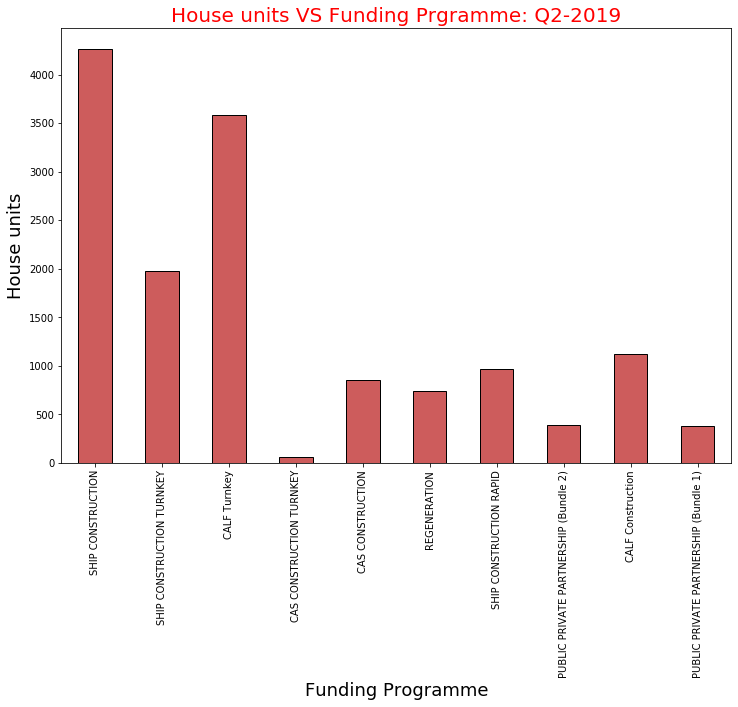

In [22]:
# PLotting 'funding programme' and 'house units under the programe' for Q2-2019

matplotlib.rc('figure', figsize=(12, 8))
df_1_Fund_Prog_No_of_Units.plot(kind='bar',x='Funding Programme',y='Sum of house units', legend=False, edgecolor='black', color='indianred')
plt.xlabel('Funding Programme', fontsize=18)
plt.ylabel('House units', fontsize=18)
plt.title('House units VS Funding Prgramme: Q2-2019', fontsize=20, color='red')
plt.show()

The above graphical representation of <i><u>'House Units VS Funding Programmes of Q2-2019'</u></i> clearly shows that:

<b>Maximum number of houses</b> during this quarter of the year are tagged under the <u>funding programme</u> of <b>'SHIP CONSTRUCTION'.</b>

<b>'CALF TURNKEY'</b> funding programme has the <b>second highest number of house units</b> associated with it.

<b>'CAS CONSTRUCTION TURNKEY'</b> funding programme has recorded the <b>minimum number of houses</b> tagged to it.

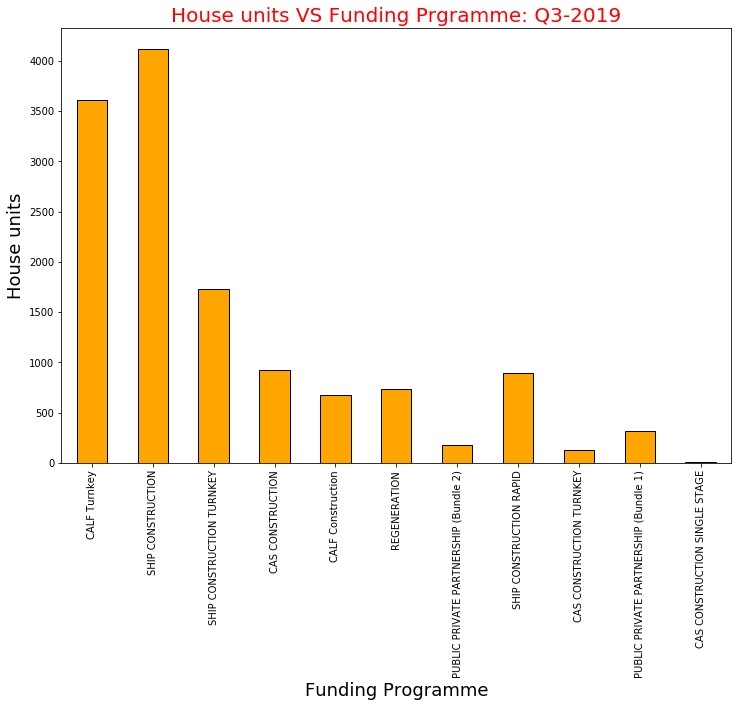

In [23]:
# PLotting funding programme and house units under the programe for Q2-2019

matplotlib.rc('figure', figsize=(12, 8))
df_2_Fund_Prog_No_of_Units.plot(kind='bar',x='Funding Programme',y='Sum of house units', legend=False, edgecolor='black', color='orange')
plt.xlabel('Funding Programme', fontsize=18)
plt.ylabel('House units', fontsize=18)
plt.title('House units VS Funding Prgramme: Q3-2019', fontsize=20, color='red')
plt.show()

The above graphical representation of <u><i>'House Units VS Funding Programmes of Q3-2019'</i></u> clearly indicates:

<b>Maximum number of houses</b> during this quarter of the year are tagged under the funding programme of <b>SHIP CONSTRUCTION.</b>

<b>CALF TUMKEY</b> funding programme has the <b>second highest number of house</b> units associated with it.

<b>CAS CONSTRUCTION SINGLE STAGE</b> funding programme has recorded the <b>minimum number of houses</b> tagged to it.

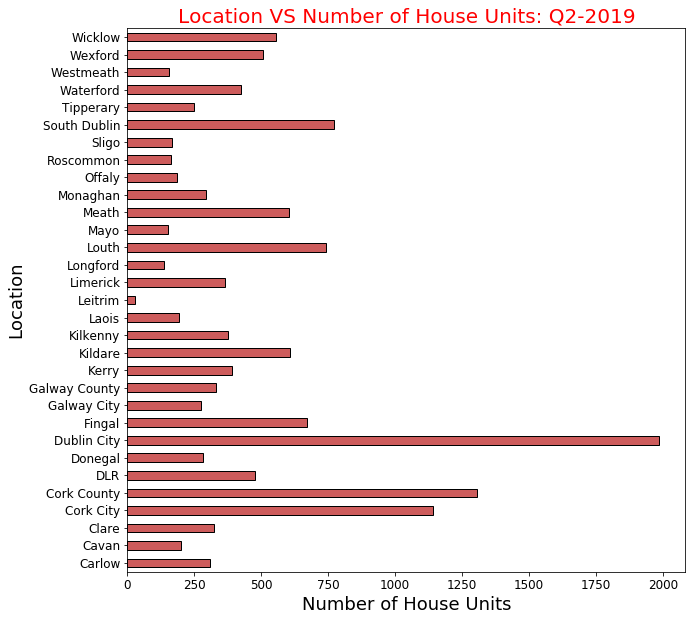

In [24]:
# Funtion to display graph of Location VS Number of house units of Q2-2019

matplotlib.rc('figure', figsize=(12, 8))
df_1_LA_No_of_Units.plot(kind='barh',x='Location',y='Sum of house units', figsize = (10,10), legend=False,fontsize=12,edgecolor='black', color='indianred')
plt.xlabel('Number of House Units', fontsize=18)
plt.ylabel('Location', fontsize=18)
plt.title('Location VS Number of House Units: Q2-2019', fontsize=20, color='red')
plt.show()

The above horizontal bar chart gives idea of the construction status of <u>number of house units depending on its Location</u> as per the Social Housing Construction Status Report Q2 2019.

From the above graph, we can easily say that government of Ireland has focused on multiple locations for growing their house construction statuses and the focus is clearly <b>diversified and aiming to produce houses in multiple locations/counties</b>.

It is clear from the above graph that government has <b>mainly focused on 'Dublin City'</b> for its hub for house construction and thus DUBLIN CITY has reported the <b>maximum number</b> of house construction statuses.

On other hand <b>'Leitrim'</b> has recorded <b>minimum number</b> of house units construction statuses.

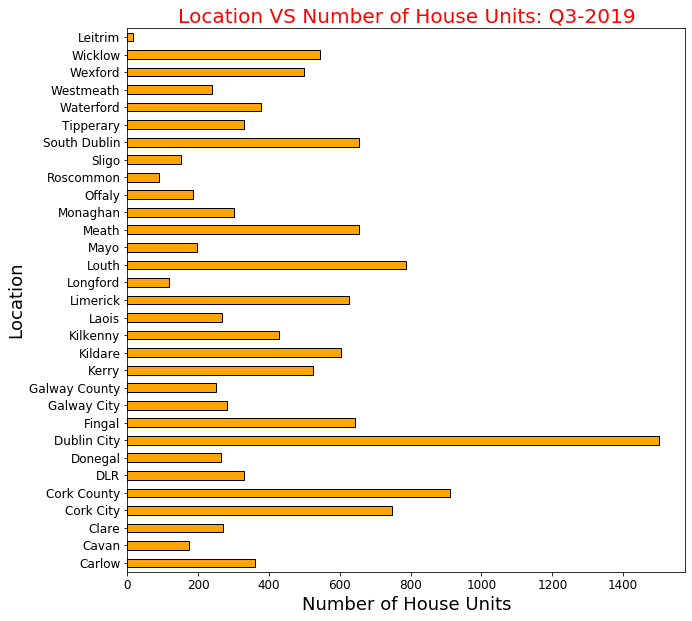

In [25]:
# Funtion to display graph of Location VS Number of house units of Q2-2019

matplotlib.rc('figure', figsize=(12, 8))
df_2_LA_No_of_Units.plot(kind='barh',x='Location',y='Sum of house units', figsize = (10,10), legend=False, fontsize=12,edgecolor='black', color='orange')
plt.xlabel('Number of House Units', fontsize=18)
plt.ylabel('Location', fontsize=18)
plt.title('Location VS Number of House Units: Q3-2019', fontsize=20, color='red')
plt.show()

The above horizontal bar chart gives idea of the construction status of number of house units depending on its <u>Location as per the Social Housing Construction Status Report Q3 2019</u>.

It is clear from the above graph that government has <b>mainly focused on DUBLIN CITY</b> for its hub for house construction and thus Dublin City has reported the <b>maximum number</b> of house construction statuses.

<b>'Dublin City'</b> (highest) and <b>'Cork County'</b> (Second highest) was the <b>main focuse</b> of Ireland government for house construction.

On other hand <b>'LEITRIM'</b> has maintained its <b>minimum number</b> of house units construction statuses <b>same as that of last quarter.</b>

In [26]:
# Plot the group-bar chart for comparision of all house construction statuses of Q2,Q3-2019

def plot_group_bar_chart(attributes, bar1, bar2):
    fig = go.Figure()
    #fig= plt.figure(figsize=(6,3))
    fig.add_trace(go.Bar(
        x=attributes,
        y=bar1,
        name='Q2-2019',
        marker_color='indianred'
    ))
    fig.add_trace(go.Bar(
        x=attributes,
        y=bar2,
        name='Q3-2019',
        marker_color='lightsalmon'
    ))

    # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    fig.update_layout(barmode='group', xaxis_tickangle=-45,
    title=
        {
        'text': "Comparision of Q2-2019 vs Q3-2019",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        },
    xaxis_title="Status of House Units",
    yaxis_title="Number of House Units",
    autosize=False,
    width=900,
    height=800)
    fig.show()
    
    
plot_group_bar_chart(Columns_for_analysis, df_1_analysis_result['Sum of house units'],df_2_analysis_result['Sum of house units'])
    

The above group-bar chart gives the clear <u>comparision of house construction statuses of Ireland during the period of Q2-2019 and Q3-2019</u>.

<i>Note: If you hover on any bar in the above graph, you will get descriptive properties and values related to that bar.</i>

1. There were 1615 houses under <b>stage 1</b> in Q2, which <u>came down</u> to 1179 in Q3.
2. The number of 1279 houses of <b>Pre-plannig stage</b> in Q2 slightly increased to 1288 in Q3.
3. In Q2, we had 882 houses under <b>stage 3</b> and it <u>went down</u> to 446 in Q3.
4. We can clearly observe the considerable <u>slight decrease</u> for house units of 1904 of Q2 to 1723 Q3 for the <b>stage 4</b> status.
5. In Q2, there were 3946 houses were under <b>On-site</b> status, where as in Q4 the number <u>decreased</u> to 3704
6. Finally, at the end of Q2, 4741 houses were completely builded, whereas in Q3 we have <u>good number</u> of 4976 houses in <b>Completed</b> status.

In nutshell, <b>Q2-2019</b> appears to be <b>slightly impressive in all stages except final status-COMPLETED</b>,

Whereas, <b>Q3-2019</b> has <b>more numbers of houses in Completed status</b> as compared to Q2-2019.

## Summary:

1. In terms of <b>location</b>, government of Ireland has given <b>more importance to 'Dublin City'</b> for building maximum number of houses in both Q2,Q3-2019 as compared to any other location/county, 
where as <b>'Leitrim'</b> remained on the <b>least priority</b> for both Q2-2019 and Q3-2019.


2. In terms of <b>funding programme</b>, <b>'Ship Construction'</b> was the <b>most favourite</b> choice for both quarters.
On other hand, <b>'CAS Construction Turnkey'</b> was <b>the least favourite</b> in <i>Q2-2019</i> and <b>'CAS Construction Single Phase'</b> was the <b>least considerable</b> in <i>Q3-2019</i>.


3. Talking about overall <b>speed of entire construction cycle</b> of houses from the stage 1 of capital approval to ON-SITE, <b>Q2-2019 is more impressive than Q3-2019</b>,
wherease <b>Q3-2019 has more number of houses in Completed</b> status. 